# Analyse et attaque adversaire 

sur un classifieur ultra-simple, c-a-d. un seul neurone sigmoidale (une regression logistique) sur MINISTm(pour Deep Learning)

En résumé, le principe d’une attaque adversaire est de manipuler légèrement une entrée en exploitant les informations sur le gradient de la perte pour induire une erreur dans la prédiction du modèle. Ces attaques mettent en lumière la nécessité de concevoir des modèles plus robustes et de développer des méthodes pour détecter et contrer ces manipulations.

In [44]:
import numpy as np 
import keras
import matplotlib.pyplot as plt
from keras import layers
from keras.datasets import mnist
from keras.models import Sequential 

In [3]:
seplin = Sequential([
    # mnist: images 28x28 des chiffres ecrits a la main 
    keras.Input(shape=(28,28)),
    layers.Flatten(),  # juste changement de forme,
    # on convertit  une matrice 28x28 en un vecteur 1D de taille (784, )
    layers.Dense(1, activation='sigmoid')
])

In [4]:
seplin.compile(loss='binary_crossentropy', # pour la classif. binaire
               optimizer='adam',
               metrics=['accuracy']
              )

In [5]:
# Donnée
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [6]:
# normalisation 
def preprocessing(tab):
    a = tab.astype('float32') / 255.0
    return a

In [7]:
X_train = preprocessing(train_data)
X_test = preprocessing(test_data)

In [8]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [9]:
from keras.utils import to_categorical 
y_train_cat = to_categorical(train_labels)
y_trest_cat = to_categorical(test_labels)

In [10]:
y_train_cat[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [20]:
X_train[0].shape

(28, 28)

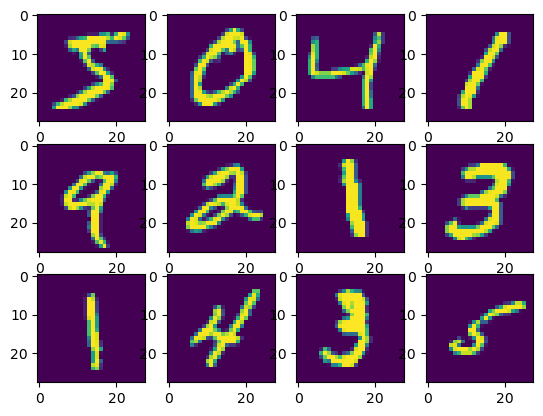

In [26]:
# Visu
imgs = X_train[:12, :]
for i in range(12):
    plt.subplot(3, 4, i+1)  # une grille d'images
    plt.imshow(imgs[i], cmap='viridis')
plt.show()

In [28]:
X_train.shape

(60000, 28, 28)

In [30]:
X_test.shape

(10000, 28, 28)

In [48]:
# decomposition en 2 classes : 0 et non-zero 
def digits_to_bin(k, labels):
    # mettre l'étiquete 0 pour le chiffre k et 1 pour non-k
    y_bin = np.zeros(len(labels))
    for i in range(len(labels)):
        if labels[i] == k:
            y_bin[i] = 0
        else:
            y_bin[i] = 1
    # idiome pythonique
    # y_bin = [if item ==k else 1 for item in labels[:10]]
    return y_bin 

In [40]:
y_train_bin = digits_to_bin

In [32]:
# petit test de forme pythonique
[0 if item ==0 else 1 for item in train_labels[:10]]

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1]

In [36]:
[int(item!= 0) for item in train_labels[:10]]

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1]

In [50]:
y_train_bin = digits_to_bin(0, train_labels)
y_test_bin = digits_to_bin(0, test_labels)

In [52]:
seplin.fit(X_train, y_train_bin, epochs=150)

Epoch 1/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9566 - loss: 0.1385  
Epoch 2/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - accuracy: 0.9900 - loss: 0.0366
Epoch 3/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.9908 - loss: 0.0316
Epoch 4/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - accuracy: 0.9918 - loss: 0.0268
Epoch 5/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 862us/step - accuracy: 0.9920 - loss: 0.0262
Epoch 6/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 897us/step - accuracy: 0.9923 - loss: 0.0264
Epoch 7/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.9923 - loss: 0.0250
Epoch 8/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 803us/step - accuracy: 0.9926 - loss: 0.0241
Epoch 9/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 788us/step - accuracy: 0.9931 - loss: 0.0236
Epoch 10/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 848us/step - accuracy: 0.9932 - loss: 0.0242
Epoch 11/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - accuracy: 0.9933 - loss: 0.02

In [61]:
seplin.evaluate(X_test, y_test_bin)  # [loss, accuracy] sur X_test
# pas de signe de surapprentissage

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9909 - loss: 0.0289


[0.026253677904605865, 0.9919999837875366]

## Regardons les détails du resultat

In [ ]:
# Trouver les images "vulnerables" c.a.d  les plus proche de la frontière de décision 

In [57]:
y_pred = seplin.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step


In [75]:
distance_bord = np.abs(y_pred - 0.5)
distance_bord[:10]

array([[0.5       ],
       [0.49999952],
       [0.49999982],
       [0.49952686],
       [0.4990055 ],
       [0.49999994],
       [0.49999404],
       [0.5       ],
       [0.4994834 ],
       [0.5       ]], dtype=float32)

In [77]:
distance_bord.shape  # 2 dimenssion 

(10000, 1)

In [79]:
distance_bord.flatten().shape

(10000,)

In [63]:
seplin.save('seplin.keras')  # pour sauvegader le modèle, cf keras.io

In [176]:
# l'indice d'image la plus proche de la frontiere
i0 = np.argmin(distance_bord)
i0

2713

In [71]:
# trouver 100 images les plus proches
ind_proches = np.argsort(distance_bord.flatten())

In [73]:
ind_proches[:10]

array([2713, 2476, 1570, 1984, 7427, 3749, 8859,  713, 2449, 4620],
      dtype=int64)

# Remarque à retenir

#### regardez toujours la forme (shape, type) de nos donnée

[0.5018052]
1.0
6


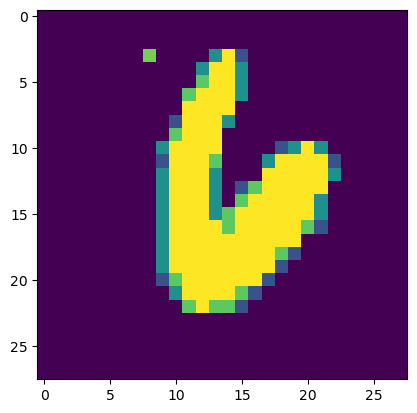

In [178]:
# quel est le chiffre correspondant ? 
print(y_pred[i0])
print(y_test_bin[i0+5])   # label non zero predit correctement
print(test_labels[i0+5])
plt.imshow(X_test[i0+5])
plt.show()
# si on a pas le même cas de figure, on prend une image/indice suivant dans ind_proches

In [98]:
# On se propose de modifier légèrement l'image pour la faire catégoriser comme 0!

# on cherche un poids (le plus) important et on modifie le pixel correspondant.
# (on veut un poids important pour que la modification de pixel soit minime)
# Question : comment connaitre les poids / parametres du modele

seplin.layers # liste de couches 

[<Flatten name=flatten, built=True>, <Dense name=dense, built=True>]

In [100]:
seplin.layers[1].weights[0]  # matrice de 784 poids

<KerasVariable shape=(784, 1), dtype=float32, path=sequential/dense/kernel>

In [102]:
seplin.layers[1].weights[0].numpy().argmax()  # le poids le plus important

76

In [104]:
# pixel correspondant : 28 pixels par ligne
print("ligne", 76 // 28)
print("colonne", 76 % 28)

ligne 2
colonne 20


In [106]:
seplin.layers[1].weights[0].numpy()[76]  # positif ...

array([13.860495], dtype=float32)

In [136]:
X_test[i0+5][2, 20] # le pixel correspondant a valeur 0
# on ne peut pas diminuer sa valeur
# il faut chercher un autre poids 

0.0

In [140]:
# Mais observe que dans la troisime ligne de notre image i0,
# on a deux deux

X_test[i0+5][3]

array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.5019608, 1.       , 0.2509804, 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       ], dtype=float32)

In [182]:
X_test[i0+5][3,13]

0.5019608

In [148]:
# Quel poids correspond au pixel [3, 13] ?
poids =seplin.layers[1].weights[0].numpy().reshape(28,28)  # extraction des poids

In [184]:
poids[3, 13]  # ce poids est petit mais associé avec un pixel 

-0.023515228

In [156]:
# contribution de pixel [3, 14]
0.34 * 1

0.34

In [164]:
# or il suffit de modifier le produit poids*luminosite
# de ce pixel, pour diminuer l'argument de la fonction sigma
#  qui calcul la probabilité d'appartenance à la sortie.
print("distance au bord", distance_bord[i0+5])

# calcul de difference avec le poids modifié 
(0.264 * 0.84) - (0.264 * 0.866667)  # donc 0.84 convient comme changement minilae
# (on pourrait chercher la modification minimale exacte, mais on le fait grossierement a la main,
# car cela suffit largement)

distance au bord [0.49999422]


-0.007040088

In [166]:
X_test[i0+5][3,8] = 0.79

In [168]:
y_pred_new = seplin.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [170]:
y_pred_new[i0+5]  # mainteant l'image i0+5 est mal classifiée !
# rappel : seuil de décision est de 0.5 pour la categorisation 

array([0.99999523], dtype=float32)

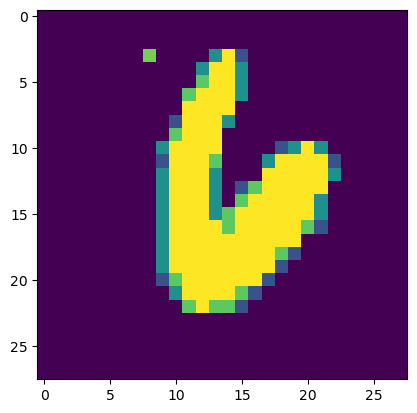

In [172]:
plt.imshow(X_test[i0+5])
plt.show()

# Question / exercice de généralisation 

Modifier de facon invisible une image qui est pas tout près de la frontière (par exemple, la prédiction de base est de 0.25 ou 0.75).

indication : trouver plusieurs poids importants (argmax)

### Remarque: Ce notebook sera mis en ligne avec le modèle en consideration.

## Question 2:

Quel est l'image qui réalise le zero "le plus parfait", c.a.d qui a une prediction aussi petite que possible,
c.a.d prediction nulle ? 

Idée: dans l'image, mettre 0 dans les pixels associés aux poids positifs, et mettre aux pixels associées aux poids négatifs

In [187]:
poids > 0

array([[ True, False, False,  True,  True, False,  True,  True, False,
        False,  True, False,  True,  True,  True,  True, False, False,
        False,  True, False, False, False, False,  True, False, False,
        False],
       [False, False, False,  True, False, False,  True,  True,  True,
         True,  True, False, False, False,  True, False, False, False,
         True,  True,  True,  True,  True,  True, False, False, False,
        False],
       [ True,  True,  True, False, False,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True, False,  True,  True,  True,  True,  True,  True, False,
         True],
       [False,  True,  True,  True, False, False,  True,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True, False,
         True,  True, False,  True,  True, False,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True, False,
        False

In [189]:
# poids positifs
pp = (poids > 0).astype(int).reshape(28,28)   # convertion False-True en 0-1

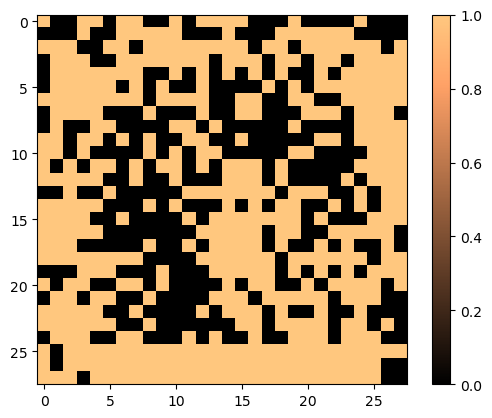

In [199]:
plt.imshow(pp, cmap='copper')
plt.colorbar()
plt.show()

In [193]:
# "Zero parfait" est l'inversion du tableau pp
zero = 1 - pp

In [195]:
seplin.predict(np.array([zero]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


array([[0.]], dtype=float32)

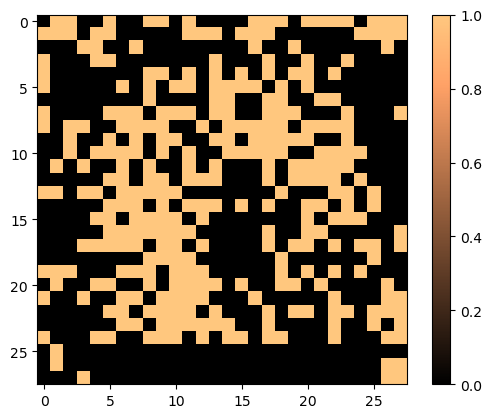

In [201]:
plt.imshow(1-pp, cmap='copper')
plt.colorbar()
plt.show()

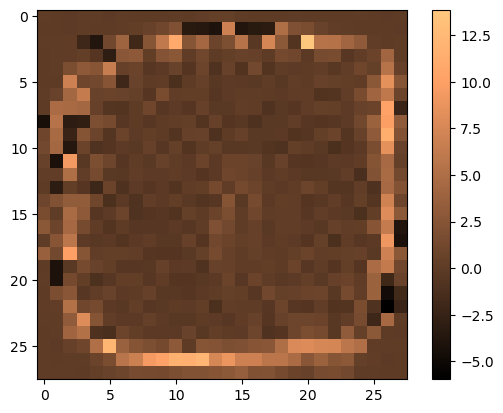

In [203]:
# Enfin , quel sont les poids ("neuro-anatomie")

plt.imshow(poids, cmap='copper')
plt.colorbar()
plt.show()

In [ ]:
# on vois que le reseau a appris des regularité de notre dataset (bon centrage des zeros par exemple), 
# et non une forme generale / geometrique du chiffre 0.